# Insurance Company Benchmark CLasificador

>Librerías que se van a utilizar:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, make_scorer, f1_score, log_loss, hinge_loss
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import ConvergenceWarning

Ejecutar completamente este documento no es instantáneo, lleva algunos minutos, entorno a 5 minutos, pero siempre termina de ejecutarse, no se queda de forma indefinida y siempre termina mucho antes de llegar a los 10 minutos.

#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos.

Este problema de clasificación binaria se trata de, a partir de las muestras de entrenamiento y test obtenidas de una base de datos proporcionada, donde cada muestra contiene información sobre un cliente de la compañia de seguros, se busca aprender una función $g$ que clasifique cada muestra como poseedor de una poliza de seguros de Caravana o no poseedor de una poliza de Caravana (El problema originalmente consistía en estimar el número de polizas de Caravana de cada muestra y ha sido modificado a estimar si tiene 1 o 0 polizas debido a las características de la salida de la base de datos).
   
Cada muestra posee 85 atributos, cada uno representando un dato del cliente, y una etiqueta representando si tiene o no poliza de Caravana. Por lo tanto cada muestra $n$ se identificará como un vector $x_n$ con 85 valores que son todos números y tiene una etiqueta asociada representada por un valor $y \in \{0,1\}$, con $0$ para representar que no tiene poliza y $1$ para representar que tiene una poliza. Entonces $X$ será el vector de muestras $x_n$ y el elemento $Y$ será el vector de etiquetas $y$.
  
Para aprender la función $g$ se empleará un algoritmo de aprendizaje automático que utilice el conjunto de entrenamiento para ajustar el vector $w$ de prámetros (pesos) del modelo (sobre una clase de funciones $\mathcal{H}$), minimizando el error asociado al algoritmo de las soluciones calculadas. Como resultado de aplicar el algoritmo al problema, obtendremos una función $g$ solución que para cualquier muestra $x$ del espacio total de las posibles muestras, nos proporcione una etiqueta $y$ que será la predicción de la clasificación de la muestra. Finalmente se utilizará el conjunto de muestras de test para evaluar el error fuera de la muestra de entrenamiento.   

Durante el proceso de aprendizaje el conjunto de datos puede modificarse, tratando de no afectar la importancia e información que ofrecen los datos, para obtener mejores resultados a la hora de aplicar los algorimtos de aprendizaje automático que utilicemos para encontrar el mejor clasificador para el problema.

Todas las variables del conjunto de datos son:

| Nr | Name    | Description                                   |
|----|---------|-----------------------------------------------|
| 1  | MOSTYPE | Customer Subtype see L0                       |
| 2  | MAANTHUI | Number of houses 1 – 10                       |
| 3  | MGEMOMV  | Avg size household 1 – 6                       |
| 4  | MGEMLEEF | Avg age see L1                                 |
| 5  | MOSHOOFD | Customer main type see L2                      |
| 6  | MGODRK  | Roman catholic see L3                          |
| 7  | MGODPR  | Protestant ...                                 |
| 8  | MGODOV  | Other religion                                 |
| 9  | MGODGE  | No religion                                    |
| 10 | MRELGE  | Married                                        |
| 11 | MRELSA  | Living together                                |
| 12 | MRELOV  | Other relation                                 |
| 13 | MFALLEEN | Singles                                        |
| 14 | MFGEKIND | Household without children                     |
| 15 | MFWEKIND | Household with children                        |
| 16 | MOPLHOOG | High level education                           |
| 17 | MOPLMIDD | Medium level education                         |
| 18 | MOPLLAAG | Lower level education                          |
| 19 | MBERHOOG | High status                                    |
| 20 | MBERZELF | Entrepreneur                                   |
| 21 | MBERBOER | Farmer                                         |
| 22 | MBERMIDD | Middle management                              |
| 23 | MBERARBG | Skilled labourers                              |
| 24 | MBERARBO | Unskilled labourers                            |
| 25 | MSKA    | Social class A                                 |
| 26 | MSKB1   | Social class B1                                |
| 27 | MSKB2   | Social class B2                                |
| 28 | MSKC    | Social class C                                 |
| 29 | MSKD    | Social class D                                 |
| 30 | MHHUUR  | Rented house                                   |
| 31 | MHKOOP  | Home owners                                    |
| 32 | MAUT1   | 1 car                                          |
| 33 | MAUT2   | 2 cars                                         |
| 34 | MAUT0   | No car                                         |
| 35 | MZFONDS | National Health Service                        |
| 36 | MZPART  | Private health insurance                       |
| 37 | MINKM30 | Income < 30.000                                |
| 38 | MINK3045 | Income 30-45.000                               |
| 39 | MINK4575 | Income 45-75.000                               |
| 40 | MINK7512 | Income 75-122.000                              |
| 41 | MINK123M | Income >123.000                                |
| 42 | MINKGEM | Average income                                 |
| 43 | MKOOPKLA | Purchasing power class                         |
| 44 | PWAPART | Contribution private third party insurance L4  |
| 45 | PWABEDR | Contribution third party insurance (firms) ... |
| 46 | PWALAND | Contribution third party insurane (agriculture)|
| 47 | PPERSAUT | Contribution car policies                      |
| 48 | PBESAUT | Contribution delivery van policies             |
| 49 | PMOTSCO | Contribution motorcycle/scooter policies       |
| 50 | PVRAAUT | Contribution lorry policies                    |
| 51 | PAANHANG | Contribution trailer policies                  |
| 52 | PTRACTOR | Contribution tractor policies                  |
| 53 | PWERKT  | Contribution agricultural machines policies    |
| 54 | PBROM   | Contribution moped policies                    |
| 55 | PLEVEN  | Contribution life insurances                   |
| 56 | PPERSONG | Contribution private accident insurance policies |
| 57 | PGEZONG  | Contribution family accidents insurance policies |
| 58 | PWAOREG  | Contribution disability insurance policies     |
| 59 | PBRAND  | Contribution fire policies                     |
| 60 | PZEILPL | Contribution surfboard policies                |
| 61 | PPLEZIER | Contribution boat policies                     |
| 62 | PFIETS  | Contribution bicycle policies                  |
| 63 | PINBOED | Contribution property insurance policies       |
| 64 | PBYSTAND | Contribution social security insurance policies|
| 65 | AWAPART | Number of private third party insurance 1 - 12 |
| 66 | AWABEDR | Number of third party insurance (firms) ...    |
| 67 | AWALAND | Number of third party insurane (agriculture)   |
| 68 | APERSAUT | Number of car policies                         |
| 69 | ABESAUT | Number of delivery van policies                |
| 70 | AMOTSCO | Number of motorcycle/scooter policies          |
| 71 | AVRAAUT | Number of lorry policies                       |
| 72 | AAANHANG | Number of trailer policies                     |
| 73 | ATRACTOR | Number of tractor policies                     |
| 74 | AWERKT  | Number of agricultural machines policies       |
| 75 | ABROM   | Number of moped policies                       |
| 76 | ALEVEN  | Number of life insurances                      |
| 77 | APERSONG | Number of private accident insurance policies  |
| 78 | AGEZONG  | Number of family accidents insurance policies  |
| 79 | AWAOREG  | Number of disability insurance policies        |
| 80 | ABRAND  | Number of fire policies                        |
| 81 | AZEILPL | Number of surfboard policies                    |
| 82 | APLEZIER | Number of boat policies                         |
| 83 | AFIETS  | Number of bicycle policies                      |
| 84 | AINBOED | Number of property insurance policies           |
| 85 | ABYSTAND | Number of social security insurance policies    |
| 86 | CARAVAN | Number of mobile home policies 0 - 1            |



| L0 | Value Label                         |
|----|------------------------------------|
| 1  | High Income, expensive child        |
| 2  | Very Important Provincials          |
| 3  | High status seniors                 |
| 4  | Affluent senior apartments          |
| 5  | Mixed seniors                       |
| 6  | Career and childcare                |
| 7  | Dinki's (double income no kids)     |
| 8  | Middle class families               |
| 9  | Modern, complete families           |
| 10 | Stable family                       |
| 11 | Family starters                     |
| 12 | Affluent young families             |
| 13 | Young all american family           |
| 14 | Junior cosmopolitan                 |
| 15 | Senior cosmopolitans                |
| 16 | Students in apartments              |
| 17 | Fresh masters in the city           |
| 18 | Single youth                        |
| 19 | Suburban youth                       |
| 20 | Ethnically diverse                  |
| 21 | Young urban have-nots               |
| 22 | Mixed apartment dwellers             |
| 23 | Young and rising                    |
| 24 | Young, low educated                  |
| 25 | Young seniors in the city           |
| 26 | Own home elderly                    |
| 27 | Seniors in apartments               |
| 28 | Residential elderly                 |
| 29 | Porchless seniors: no front yard    |
| 30 | Religious elderly singles           |
| 31 | Low income catholics                 |
| 32 | Mixed seniors                        |
| 33 | Lower class large families           |
| 34 | Large family, employed child         |
| 35 | Village families                     |
| 36 | Couples with teens 'Married with children'|
| 37 | Mixed small town dwellers           |
| 38 | Traditional families                |
| 39 | Large religous families              |
| 40 | Large family farms                   |
| 41 | Mixed rurals                         |


| L2 | Label                    |
|----|--------------------------|
| 1  | Successful hedonists     |
| 2  | Driven Growers           |
| 3  | Average Family           |
| 4  | Career Loners            |
| 5  | Living well              |
| 6  | Cruising Seniors         |
| 7  | Retired and Religeous    |
| 8  | Family with grown ups    |
| 9  | Conservative families    |
| 10 | Farmers                  |

| L3 | Label |
|-------|-------|
| 0     | 0%    |
| 1     | 1 - 10%   |
| 2     | 11 - 23%  |
| 3     | 24 - 36%  |
| 4     | 37 - 49%  |
| 5     | 50 - 62%  |
| 6     | 63 - 75%  |
| 7     | 76 - 88%  |
| 8     | 89 - 99%  |
| 9     | 100%   |

| L4 | Label                |
|-------|----------------------|
| 0     | 0                    |
| 1     | 1 - 49               |
| 2     | 50 - 99              |
| 3     | 100 - 199            |
| 4     | 200 - 499            |
| 5     | 500 - 999            |
| 6     | 1000 - 4999          |
| 7     | 5000 - 9999          |
| 8     | 10.000 - 19.999      |
| 9     | 20.000 - ?            |



>Acceder a los datos:

In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta datos (que contiene X_train.npy, y_train.npy, X_test.npy y y_test.npy)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Los datos están separados en dos partes, una para entrenamiento y otra para test. Se cargan los datos y se unen en un conjunto para poder hacer la propia partición de los datos para entrenamiento y test:

In [ ]:
#Primera parte de los datos (parte de entrenamiento)
file_path = 'drive/MyDrive/Colab Notebooks/datos/ticdata2000.txt'

datos = np.loadtxt(file_path, delimiter='\t')#Funcion cargar datos desde txt

x1 = datos[:, :-1]  # todas las columnas excepto la última
y1 = datos[:, -1]   # ultima columna donde estan las etiquetas
x1 = np.array(x1, np.float64)
y1 = np.array(y1, np.float64)

#Segunda parte de los datos (separados para test)
file_path = 'drive/MyDrive/Colab Notebooks/datos/ticeval2000.txt' #Vector de muestras sin las etiquetas
x2 = np.loadtxt(file_path, delimiter='\t')#Funcion cargar datos desde txt
file_path = 'drive/MyDrive/Colab Notebooks/datos/tictgts2000.txt' #Vector de muestras sin las etiquetas
y2 = np.loadtxt(file_path, delimiter='\t')#Funcion cargar datos desde txt
x2 = np.array(x2, np.float64)
y2 = np.array(y2, np.float64)

#Unir datos
x = np.row_stack((x1,x2))
y = np.concatenate((y1,y2))
x = np.array(x)
y = np.array(y)
# Mostrar dimension del conjunto de muestras total
print("Forma de vector X de muestras:", x.shape)
print("Forma de vector X de etiquetas:", y.shape)


Forma de vector X de muestras: (9822, 85)
Forma de vector X de etiquetas: (9822,)


Podemos observar que tenemos un total de 9822 muestras en nuestro conunto de datos y para cada muestra poseemos un total de 85 variables más la etiqueta de cada muestra.

Después de obtener el conjunto total de datos separamos los datos en un conjunto de entrenamiento y otro de test. Realizamos esto lo primero para evitar observar los datos de test y realizar "Data Snooping" donde el conjunto de datos podría influenciar nuestra elección sobre el modelo a utilizar para resolver el problema de aprendizaje automático. Para separar las muestras en train y test, dos distribuciones muy comunes en la práctica son 70% de train y 30% de test, y 80% de train y 20% de test. Al utilizar una distribución 70-30 obtendríamos una estimación mejor del error $E_{out}$ a partir del error $E_{test}$ que con la de 80-20, ya que se utilizaría un número mayor de muestras para obtener la estimación, un 30% del total, que en la otra distribución que usaría un 20% del total. Sin embargo, al utilizar una distribución 80-20 obtendríamos un mejor ajuste del problema al entrenar el modelo de aprendizaje con más datos que con la otra distribución, teniendo una mejor generalización en el conjunto de entrenamiento de la función que tratamos de aproximar. En general cuantos más datos se utilicen en test mejor será la estimación del error  $E_{out}$ y cuantos más datos se utilicen en el entrenamiento, el clasificador calculado se ajustará mejor al problema, ya que tiene más datos con los que aprender.  
En este caso he elegido una distribución de 80% para entrenamiento y 20% de test, teniendo en cuenta que con esta distribución se tiene un número menor de datos para estimar el error  $E_{out}$, pero se tiene un número mayor de datos para entrenar y para utilizar Cross-Validation con un conjunto de datos mayor.

In [ ]:
np.random.seed(0)
trainPortion = 0.8 #porcentaje de train, el porcentaje de test será la resta de 1 menos el porcentaje de train

#-------------Obtener índices

indexesData = np.arange(len(y)) #Indices del conjunto de muestras
#-------------Desordenar indices y separar en rain y test

np.random.shuffle(indexesData) #Desordenar indices de las muestras
numberTrain = round(len(indexesData)*trainPortion) #numero de muestras para train
trainIndexes = indexesData[:numberTrain]
testIndexes = indexesData[numberTrain:]

#-------------Datos desorden:ados para train y test

trainX = x[trainIndexes]
testX = x[testIndexes]
trainY = y[trainIndexes]
testY = y[testIndexes]

#-------------Copia de los datos para mantener datos originales después del preprocesado

original_trainX = trainX.copy()
original_testX = testX.copy()
original_trainY = trainY.copy()
original_testY = testY.copy()

#-------------Mostrar resultados

print('Muestras totales:  {}'.format(len(trainY)+len(testX)))
print('Muestras train:  {}'.format(len(trainY)))
print('Muestras test:  {}'.format(len(testX)))


Muestras totales:  9822
Muestras train:  7858
Muestras test:  1964


Se podría utilizar la función `train_test_split()` de scikit-learn que ofrece un comportamiento similar al código implementado. Como podemos observar, tenemos un total de 9822 muestras, de los cuales 7858 , que representan el 80% del total, serán utilizados para entrenamiento y el resto 1964 (20% del total) para test.

>**Desbalanceo de clases:**

Vamos a observar el número total de muestras por clase para ver si las clases están debalanceadas en cuanto al número de muestras en el conjunto de entrenamiento (el conjunto de test no lo utilizamos hasta que tengamos que evaluar la mejor hipótesis seleccionada, para evitar realizar Data-Snooping):

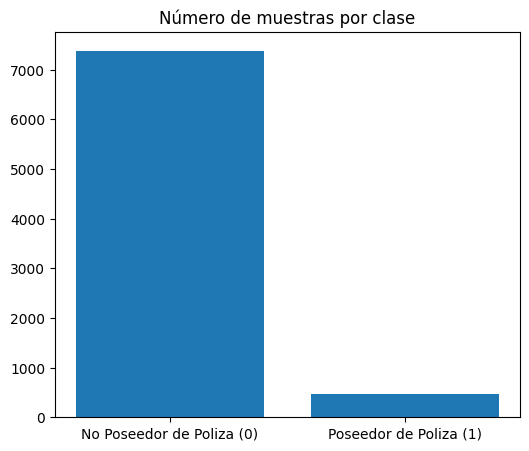

Muestras totales en entrenamiento:  7858
--- Clase 0 ---
Muestras en train:  7384
Porcentaje en train:  93.97%
--- Clase 1 ---
Muestras en train:  474
Porcentaje en train:  6.03%


In [ ]:
class_names = ['No Poseedor de Poliza (0)', 'Poseedor de Poliza (1)']

#Contar muestras por clase:
class_num = []
for i in np.unique(trainY):
  class_num.append(np.count_nonzero(trainY== i))
class_num = np.array(class_num)

# Mostrar bar plot de las clases
fig = plt.figure(figsize=(6,5))
plt.bar(class_names,class_num)#crear un grafico de barras
#plt.legend(loc='upper right') #añadir la leyenda al plot
plt.title('Número de muestras por clase')
plt.show()

#Mostar porcentajes y número de muestras
print('Muestras totales en entrenamiento:  {}'.format(len(trainY)))
for i in range(len(class_num)):
  print('--- Clase {} ---'.format(i))
  print('Muestras en train:  {}'.format(class_num[i]))
  print('Porcentaje en train:  {}%'.format(np.round(100*class_num[i]/len(trainY),2)))

Analizando los datos vemos en la gráfica de barras del número de muestras por clases que las clases estan desbalanceadas en cuanto al número de datos por clase.  En una clase hay más del 90 % de los datos y en la otra el resto que es menos del 10% del total.  
Debido a este desbalanceo, será necesario utilizar métricas de error para evaluar los resultados de los modelos distintas de la métrica de accuracy, ya que al tener un desbalanceo de mas del 90%, un clasificador que clasifique todas las muestras como la clase mayoritaria acertaría en todas las muestras de esa clase, y al representar más del 90% del conjunto de datos, obtendría un accuracy igual al porcentaje de muestras de esa clase (mas del 90%) aunque el clasificador no haya sido entrenado y falle en todas las muestras de la clase minoritaria.

>**Datos faltantes:**

Para ver si faltan datos en nuestro conjunto de datos, vamos a utilizar la función `isnull()` de la librería pandas para contar el número de datos que faltan en el conjunto. Esta función detecta si algún valor en el conjunto de datos es del tipo no numéricos o de valor nulo y devuelve una matriz de la misma forma que el conjunto de datos que recibe como parámetro, en el que cada posición devuelve verdadero si falta el dato o falso si no falta el dato:

In [ ]:
dfTrainX = pd.DataFrame(trainX) #crear dataframe para utilizar las funciones de al libreria de Pandas
num_missing = np.sum(dfTrainX.isnull().values)
print("Número de datos faltantes: ", num_missing)

Número de datos faltantes:  0


Como podemos observar no existen datos faltantes en nuestro conjunto de datos y por tanto no hay que realizar ninguna acción al respecto ya que no tenemos ningún problema de datos faltantes.

>**Codificación de los datos**

Para las variables categóricas que no tienen un orden de jerarquía entre sus posibles valores, vamos a aplicar el método One-Hot encoding para transformar las variables en un vector con cada posición reprensentando de forma binaria si la muestra es de esa categoría (1) o si no es de esa categoría (0).  
Analizando las variables del conjunto de datos he encontrado dos variables categóricas que no presentan relación de jerarquía entre sus valores que son:

*   1 MOSTYPE Customer Subtype   



| L0 | Value Label                         |
|----|------------------------------------|
| 1  | High Income, expensive child        |
| 2  | Very Important Provincials          |
| 3  | High status seniors                 |
| 4  | Affluent senior apartments          |
| 5  | Mixed seniors                       |
| 6  | Career and childcare                |
| 7  | Dinki's (double income no kids)     |
| 8  | Middle class families               |
| 9  | Modern, complete families           |
| 10 | Stable family                       |
| 11 | Family starters                     |
| 12 | Affluent young families             |
| 13 | Young all american family           |
| 14 | Junior cosmopolitan                 |
| 15 | Senior cosmopolitans                |
| 16 | Students in apartments              |
| 17 | Fresh masters in the city           |
| 18 | Single youth                        |
| 19 | Suburban youth                       |
| 20 | Ethnically diverse                  |
| 21 | Young urban have-nots               |
| 22 | Mixed apartment dwellers             |
| 23 | Young and rising                    |
| 24 | Young, low educated                  |
| 25 | Young seniors in the city           |
| 26 | Own home elderly                    |
| 27 | Seniors in apartments               |
| 28 | Residential elderly                 |
| 29 | Porchless seniors: no front yard    |
| 30 | Religious elderly singles           |
| 31 | Low income catholics                 |
| 32 | Mixed seniors                        |
| 33 | Lower class large families           |
| 34 | Large family, employed child         |
| 35 | Village families                     |
| 36 | Couples with teens 'Married with children'|
| 37 | Mixed small town dwellers           |
| 38 | Traditional families                |
| 39 | Large religous families              |
| 40 | Large family farms                   |
| 41 | Mixed rurals                         |

*   5 MOSHOOFD Customer main type

| L2 | Label                    |
|----|--------------------------|
| 1  | Successful hedonists     |
| 2  | Driven Growers           |
| 3  | Average Family           |
| 4  | Career Loners            |
| 5  | Living well              |
| 6  | Cruising Seniors         |
| 7  | Retired and Religeous    |
| 8  | Family with grown ups    |
| 9  | Conservative families    |
| 10 | Farmers                  |


He encontrado alguna variable más categórica pero representando categorías que tienen un orden en sus valores como la edad o porcentajes.
Por lo tanto vamos a plicar One-Hot encoding a esas dos variables utilizando la clase OneHotEncoder utilizando los siguiente parámetros para crear el objeto codificador:
*   categories: se especifica la lista categ que contiene las categorías de cada variable.
*   sparse_output=False: se establece en False para obtener una matriz densa en lugar de una matriz dispersa, para obtener una matriz con las columnas de cada nueva variable unificadas para añadirlas directamente al conjunto de datos.
*   drop=None: se establece en None para mantener todas las categorías en cada variable.
Después se utiliza el método fit_transform del objeto codificador para realizar la codificación One-Hot de las variables categóricas elegidas.

In [ ]:
preproc_trainX = trainX.copy()
preproc_testX = testX.copy()

variab_categ = [0, 4]  # Variables a codificar

trainX_categ = preproc_trainX[:, variab_categ]
testX_categ = preproc_testX[:, variab_categ]

#Categorias (empiezan en 1)
categ_mostype = np.arange(41)+1
categ_moshoofd = np.arange(10)+1

categ = [categ_mostype,categ_moshoofd]

#Funcion para codificar
encoder = OneHotEncoder(
     categories=categ,  # Categorías de cada variable
     sparse_output=False,  # crea una matriz sparse cuando se pone TRUE
     drop  = None  #  No quitar categorías en cada variable
     )

trainX_categ_encoded = encoder.fit_transform(trainX_categ) # Aplicar One Hot Encoding a train
testX_categ_encoded = encoder.fit_transform(testX_categ) # Aplicar One Hot Encoding a test

# Eliminar las variables categoricas que se han codificado del conjunto original
trainX_deleted = np.delete(preproc_trainX, variab_categ, axis=1)
testX_deleted = np.delete(preproc_testX, variab_categ, axis=1)

# Concatenar las variables sin modificar con las nuevas
preproc_trainX = np.concatenate((trainX_deleted, trainX_categ_encoded), axis=1)
preproc_testX = np.concatenate((testX_deleted, testX_categ_encoded), axis=1)

# Forma del conjunto de datos final
print("Forma de vector X de muestras tras codificar en training:",preproc_trainX.shape)
print("Forma de vector X de muestras tras codificar en test:",preproc_testX.shape)

Forma de vector X de muestras tras codificar en training: (7858, 134)
Forma de vector X de muestras tras codificar en test: (1964, 134)


Con esta codificación hemos conseguido codificar correctamente las variables categóricas aunque hemos añadido una cantidad significativa de variables al conjunto de muestras (como podemos observar en el número de columnas del nuevo conjunto de datos), aumentando la dimesnionalidad del problema en gran medida.  

La transformación de estos datos es necesaria que se realice también en el conjunto de test ya que la función entrendad debe recibir los mismos parámetros de entrada al evaluarse con el conjunto de test y al predecir cualquier muestra que durante el entrenamiento.

>**Escala del Conjunto de Datos**

Voy a analizar los máximos y mínimos que toman las variables del conjunto de datos de entrenamiento para observar si hay diferencias de escalas entre los distintos parámetros de las muestras. Es importante destacar que estos análisis de los datos han de hacerse únicamente en el conjunto de entrenamiento ya que el econjunto de test es el que será utilizado para evaluar el modelo final y las elecciones tanto del modelo como de las transformaciones no deben influenciarse por la información de este conjunto, y así evitar cometer Data Snooping.

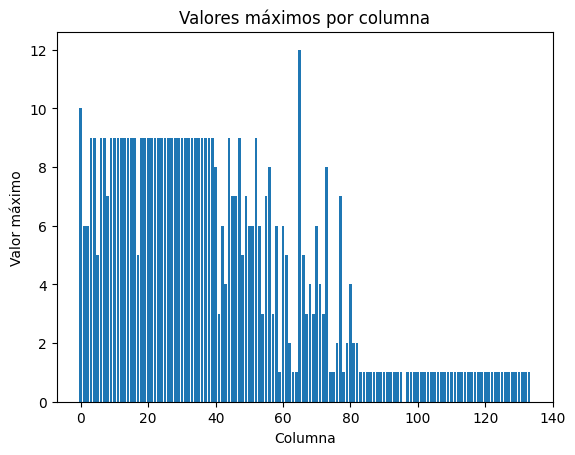

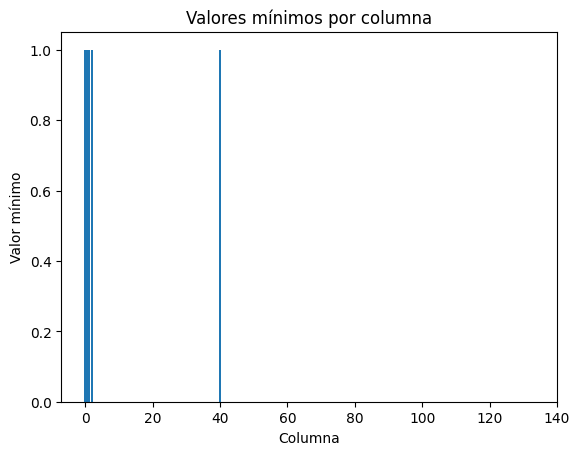

In [ ]:
# Obtener el valor máximo y mínimo de cada columna en el conjunto de entrenamiento
max_values = np.max(preproc_trainX, axis=0)
min_values = np.min(preproc_trainX, axis=0)

# Crear los nombres de las columnas
column_names = np.arange(len(max_values))

# Crear histograma de los valores máximos
plt.bar(column_names, max_values)
plt.xlabel('Columna')
plt.ylabel('Valor máximo')
plt.title('Valores máximos por columna')
plt.show()

# Crear histograma de los valores mínimos
plt.bar(column_names, min_values)
plt.xlabel('Columna')
plt.ylabel('Valor mínimo')
plt.title('Valores mínimos por columna')
plt.show()

Como podemos observar en los dos histogramas, los valores máximos de las variables difieren y aunque no es una diferencia enorme, debido a la codificación que hemos realizado antes observamos que hay un conjunto significativo de variables binarias y por tanto podemos aplicar un método de escalado de los datos para que todos los datos se encuentren en la misma escala y así evitar que una variable domine durante el ajuste del modelo. Como podemos observar en los valores mínimos, no se tienen variables negativas y por tanto podemos usar un método de escalado que transforme los datos a una escala entre 0 y 1, y así sigue sin haber variables negativas y se obtiene todas las variables con la misma escala que las binarias, entre 0 y 1. Este escalado se realiza en el apartado 4)

Ahora voy a analizar si hay alguna variable que sea constante, esto se puede implementar de muchas maneras, pero si se realiza la resta de los valores máximos menos los valores mínimos, solo las variables constantes tendrán resta 0, y de esta manera utilizamos la información que ya teníamos antes sobre los máximos y mínimos.

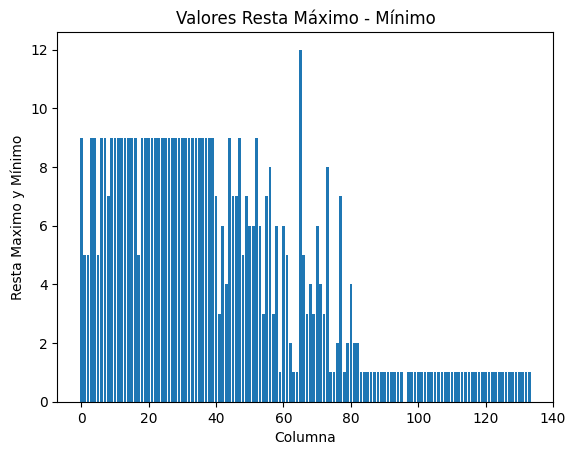

In [ ]:
# Crear histograma de las desviaciones estandar
plt.bar(column_names, max_values-min_values)
plt.xlabel('Columna')
plt.ylabel('Resta Maximo y Mínimo')
plt.title('Valores Resta Máximo - Mínimo')
plt.show()

Como pdoemos observar en el histográma de las diferencias entre los máximos y mínimos, hay una columna que vale 0.

In [ ]:
variables_ctes = []
for i in range(len(max_values)):
  if(max_values[i]  == min_values[i]): # es equivalente que sean iguales a que su resta sea 0
    print('La variable {} es constante'.format(i))
    variables_ctes.append(i)
if(len(variables_ctes) == 0):
  print('No hay variables constantes')

La variable 96 es constante


Con este último algoritmo hemos detectado que hay una varible que permanece constante en todas las muestras de entrenamiento. Esta variable no proporciona información sobre cada muestra ya que todas las muestras tienen el mismo valor y por tanto al no tener variabilidad no contribuye al modelo para predecir y diferenciar entre ambas clases, por lo tanto podemos eliminar la variable.

In [ ]:
#eliminar variables constantes:
preproc_trainX = np.delete(preproc_trainX, variables_ctes, axis=1)
preproc_testX = np.delete(preproc_testX, variables_ctes, axis=1)

# Forma del conjunto de datos final
print("Forma de vector X de muestras tras codificar en training:",preproc_trainX.shape)
print("Forma de vector X de muestras tras codificar en test:",preproc_testX.shape)

Forma de vector X de muestras tras codificar en training: (7858, 133)
Forma de vector X de muestras tras codificar en test: (1964, 133)


In [ ]:
# Obtener los máximos y minimos de nuevo:
max_values = np.max(preproc_trainX, axis=0)
min_values = np.min(preproc_trainX, axis=0)

#comprobar variables constantes denuevo
variables_ctes = []
for i in range(len(max_values)):
  if(max_values[i]  == min_values[i]): # es equivalente que sean iguales a que su resta sea 0
    print('La variable {} es constante'.format(i))
    variables_ctes.append(i)
if(len(variables_ctes) == 0):
  print('No hay variables constantes')

No hay variables constantes


Comprobamos de nuevo si hay variables constantes para segurarnos de que se han eliminado correctamente, y efectivamente ya no hay variables constantes.

Por el mismo motivo de antes, cuando se han codificado las variables categóricas, como la función clsificadora debe recibir los mismso parámtreos de entrada en el entrenameinto y test, hay que eliminar las variables constantes tanto en entrenamiento como en test.

#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos.

Como modelos lineales podríamos utilizar los siguientes:
*   Perceptrón PLA   
*   Perceptrón Pocket  
*   Regresion Lineal empelada en clasificación
*   SVM utilizando un kernel lineal
*   Regresión Logística  

De entre los posibles modelos lineales voy a utilizar SVM utilizando un kernel lineal y Regresión Logística. He elegido estos modelos ya que el modelo SVM obtiene clasificadores parecidos a los del modelo Perceptrón Pocket pero SVM maximiza la distancia entre las clases obteniendo resultados mejores y convergiendo a un clasificador óptimo, mientras que Perceptrón Pocket que unicamente trata de separar los datos mejorando en cada iteración, utilizando el gradiente de la función de pérdida y quedándose con el mejor clasificador utilizado pero no asegura converger al óptimo. Perceptrón PLA es idéntico a Perceptrón Pocket pero no almacena la mejor solución calculada por lo que obtiene peores clasificadores que utilizando el método Pocket. Por otro lado regresión lineal no es un método generalmente utilizado para clasificación ya que inicialmente está ideado para problemas de regresión donde hace falta predecir valores continuos, y aunque se pueda extender a clasificación no es su enfoque principal.  
Regresión logística es un buen modelo que ofrece buenos resultados incluso cuando existe ruido en las muestras ya que estima directamente las probabilidades de pertenecer a cada clase y en base a estas probabilidades clasifica la muestra como la clase con mayor probabilidad.


La clase de funciones $\mathcal{H}$ del modelo SVM con kernel lineal se basan en funciones lineales que son combinaciones lineales de las características de entrada aplicando unos pesos $w$ que son los parámetros que el modelo ajusta durante el aprendizaje. Se emplea un umbral de decisión y dependiendo del valor calculado con la combinación lineal de la entrada se clasifica la muestra. En nuestro caso como las etiquetas de las muestras son representadas por un 0 o un 1, la clase de funciones del modelo SVM es:

> $\mathcal{H} = \{ h_w|
h_w(x) \ para \ w \ fijado\}$  

Con $h_w(x)$:

>$h_w(x) =\left\{ \begin{array}{lcc}
 0 & si & w^Tx < 0\\
 \\ 1 & si & w^Tx \geq 0
 \end{array}
   \right. $

donde el número de valores de $w$ dependerá del número de parámetros de cada muestra del conjunto de datos.

Las funciones que pertenecen a estas clases son funciones lineaes cuyas fronteras de decisión son hiperplanos en el espacio de los parámetros de los datos. Por ejemplo en el caso del plano, con dos parámetros para los datos, las fronteras de decisión de estas funciones serían rectas que separan el plano en dos mitades, donde cada mitad representa una de las dos clases.  

Se eligen estos conjuntos de hipótesis ya que nuestro problema se trata de clasificar dos clases, por lo tanto consiste en separar el espacio paramétrico de los datos en dos partes donde cada parte represente una de las dos clases. Al utilizar modelos lineales, utilizamos funciones lineales que generar estas fronteras de decisión representadas por hiperplanos.

Entonces, como las funciones tienen por fronteras de decisión hiperplanos, el algoritmo de aprendizaje será más efectivo cuanto más separables linealmente sean los datos, incluso en algunos casos podrá converger a la solución óptima en el entrenamiento si los datos son completamente linealmente separables.






La clase de funciones $\mathcal{H}$ del modelo de regresión lineal se basan también en combinaciones lineales de las características de entrada aplicando unos pesos $w$, pero como lo que se intenta estimar es la probabilidad de pertenecer a una clase u otra, se utiliza una función logística $\theta$ que transforma el valor de la combinación lineal a un nuevo valor proporcional dentro del intervalo $[0, 1]$ (como la función sigmoide).   

Para clasificar, generalmente se elige la clase que tiene mayor probabilidad de contener a la muestra. Se elige de esta forma siguiendo la regla de Bayes que establece que si se conocen la distribución de probabilidad de las clases, el mejor clasificador sería el que clasifique cada muestra en la clase en la que tiene mayor porbabilidad de pertenecer. En nuestro caso como las etiquetas de las muestras son representadas por un 0 o un 1, la clase de funciones del modelo de Regresión Lineal es:

> $\mathcal{H} = \{ h_w|
h_w(x) \ para \ w \ fijado\}$  

Con $h_w(x)$:

>$h_w(x) =\left\{ \begin{array}{lcc}
 1 & si & \theta(w^Tx) \geq 1/2 \\
 \\ 0 & & en\ otro\ caso
 \end{array}
   \right. $

Este modelo de Regresión lineal se puede implementar con la clase `sklearn.linear_model.LogisticRegression` de la librería `sklearn`. Sin embargo, con esta implementación de regresión lineal no tenemos el hiperparámetro de la tasa de aprendizaje y por tanto voy a utilizar regresión lineal implementada con Descenso de Gradiente Estocástico (SGD) donde se puede elegir la tasa de aprendizaje que mejor se ajuste al problema, y así poder comparar con más modelos que tengan distintos hiperparámetros con los que provar valores.

Al implementar Regresión Logística con SGD, la clase de funciones que explora es la clase de funciones lineal $\mathcal{H}$ :
> $\mathcal{H} = \{ h_w|
h_w(x) \ para \ w \ fijado\}$  

Con $h_w(x)$:

>$h_w(x) =\left\{ \begin{array}{lcc}
 0 & si & w^Tx < 0\\
 \\ 1 & si & w^Tx \geq 0
 \end{array}
   \right. $

que es la misma que con SVM. Como ambos son modelos lineales tiene sentido que tengan la misma clase de funciones ya que las funciones que exploran son lineales con fronteras de decisión hiperplanos que separan el espacio pramétrico en las dos clases.

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos.

En el apartado 1 ya se ha unido en un solo conjunto todos los datos y han sido separados en training y test con una distribución de 80% training y 20% test como se ha comentado en ese apartado. En el apartado 1) ya se ha explicado las ventajas e inconvenientes de utilizar dsitintas distribuciones para separar los datos en entrenamiento y test.

>**V-Fold Cross Validation**

En el conjunto de datos de entrenamiento voy a utilizar la técnica de V-Fold Cross-Validation (CV) utilizando 10 folds (particiones del conjunto). Esta técnica generalmente ofrece una mejor estimación del error del modelo en la fase de entrenamiento que la estimación utilizando el error de entrenamiento obtenido entrenando el modelo con todos los datos de entrenameinto.

La técnica de validación cruzada con V-folds es un método utilizado para evaluar el rendimiento de un modelo de aprendizaje automático de manera más robusta y precisa. Permite utilizar todo el conjunto de datos disponible para entrenar y evaluar el modelo.Esta técnica se basa en dividir el conjunto de datos en V partes iguales (folds) donde cada uno actúa como conjunto de validación una vez, mientras que los subconjutnos restantes se utilizan como conjunto de entrenamiento para ajustar el modelo.Por lo tanto, el modelo se entrena V veces, y en cada vez se utiliza un subconjunto diferente como conjunto de validación. Al final de cada iteración, se obtiene una medida del error o de las métricas elegidas para evaluar el modelo y finalmente se ofrece como estimación final el promedio de las mediciones realizadas en todas las iteraciones.

Al utilizar la técnica de V-fold cross-validation, se obtiene una evaluación más confiable del modelo, ya que se utiliza todo el conjunto de datos tanto para entrenar como para validar el modelo. Además, al repetir el proceso V veces con diferentes particiones del conjunto de datos, se reduce el impacto del sesgo en la estimación del rendimiento del modelo.

Un valor común para el número de particiones es V = 10, pero puede variar dependiendo del tamaño del conjunto de datos y de la cantidad de datos disponibles. Valores más pequeños de V pueden dar lugar a una estimación menos precisa, mientras que valores más grandes pueden resultar en un coste computacional mayor.

Por lo tanto he elegido V = 10  ya que con un número bajo de particiones la estimación del error puede ser poco precisa (al realizar un número menor de estimaciones y particiones del conjunto) y con un número elevado de particiones el coste computaconal es elevado debido al propio coste de la técnica V-Fold Cross-Validation.


Debido al desbalanceo significativo de clases que se ha observdo anteriormente (la clase mayoritaria tiene más de un 90% de representación del total), voy a utilizar Stratified V-Fold Cross-Validation, que separa el conjunto de datos en subconjutnos con el mismo porcentaje de representación de cada clase en cada subconjunto.

Stratified V-Fold es una variante de la técnica K-fold que tiene en consideración el problema del desbalanceo de clases en el conjunto de datos. Cuando las clases no están representadas de manera equilibrada, como en este conjunto de datos donde hay una diferencia significativa en la cantidad de instancias entre las clases, la validación cruzada que he explicado anteriormente podría generar particiones en las que una o más clases estén subrepresentadas en el conjunto de validación si se eligen las particions de manera uniforme sobre el conjunto de datos.

La técnica Stratified V-Fold mantiene una proporción similar de instancias de cada clase en las particiones que genera. Utilizo este método para evitar que la clase minoritaria de este conjunto de datos quede subrepresentada en algunas de las particiones que genera la técnica y afecte a la evluación y entrenamiento del modelo.

#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.  

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas.

>**Codificación de los datos**

En el apartado 1), tras analizar los datos observé que existían dos variables categóricas que no presentaban un orden de jerarquía entre sus valores, y por tanto he aplicado el método One-Hot Encoding a esas dos variables categóricas. Este recodificación de los datos es necesaria para evitar que los algoritmos de aprendizaje automático aprendan una realción o un orden que no existe entre las categorías ya que si por ejemplo se representase la variable categórica como un número entero cada clase, como ocurre en nuestro con caso la variable *MOSTYPE Customer Subtype* que se representa como un número del 1 al 41, cada uno indicando una categoría distinta sin ningún orden entre las categorías, el algoritmo podría sociar una relación de orden o jerarquía entre los valores de la variable incorrecta.  
El método One-Hot Encoding, como ya he explicado antes, convierte las variables categóricas representadas por números en una variable como un nuevo vector de columnas binarias para cada categoría dentro de la variable asignando un 1 si pertenece a la categoría y un 0 sino.

>**Escalado de los datos**

Como hemos analizado en el apartado 1), el conjutno tiene vairables cuyos valores se encunetran en escalas distintas, entonces para evitar que una característica domine sobre otras durante el ajuste del modelo voy a escalar el conjunto de datos. Como he explicado en el apartado 1) al analizar los máximos y mínimos, he visto que muchas de las características eran binarias debido a la codifiación que he realizado de las variables categóricas y en genera no había valores negativos, por lo tanto he decidido utilizar la funcion `MinMaxScaler` de `sklearn` para escalar todos los datos a una escala entre 0 y 1, como la escala de las variables binarias. El mismo escalado que se aplica en entrenamiento tiene que aplicarse al conjunto de test y no se debe usar infromación del conjunto de test para realizar el escalado, por lo tanto utilizo el metodo `fit()` de `MinMaxScaler` con los datos de entrenamiento para realizar el mismo escalado, que se utiliza en entrenameinto con la infromación del conjunto de entrenameinto, con el conjunto de test. Al codificar varaibles categóricas, hemos añadido las variables binarias que son las ultimas variables desde la 84 hasta la última, y por tanto ya estan en una escala asequible entre 0 y 1, entonces voya aplicar el escalado al resto de las variables.

In [ ]:
variables_escalar = 83

# Escalado Min-Max
min_max_scaler = MinMaxScaler(
    feature_range = (0,1), # Rango al que escalar los datos
    copy = True # Evitar crear una copia de los datos y realizar el escalado directamente en los datos
)

#ajustar el escalador a los datos de entrenamiento
min_max_scaler.fit(preproc_trainX[:,:variables_escalar])

# aplicar el escalado a los datos de entrenamiento y test
preproc_trainX[:,:variables_escalar] = min_max_scaler.fit_transform(preproc_trainX[:,:variables_escalar]);
preproc_testX[:,:variables_escalar] = min_max_scaler.fit_transform(preproc_testX[:,:variables_escalar]);

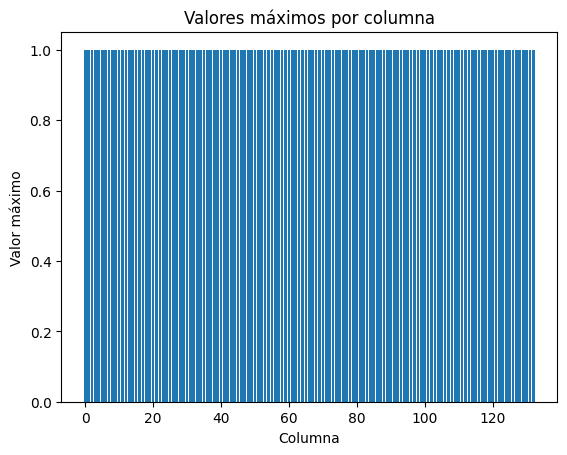

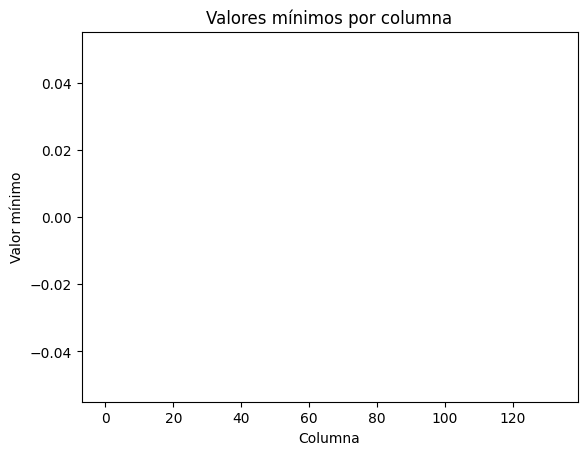

In [ ]:
# Obtener el valor máximo y mínimo de cada columna en el conjunto de entrenamiento
max_values = np.max(preproc_trainX, axis=0)
min_values = np.min(preproc_trainX, axis=0)

# Crear los nombres de las columnas
column_names = np.arange(len(max_values))

# Crear histograma de los valores máximos
plt.bar(column_names, max_values)
plt.xlabel('Columna')
plt.ylabel('Valor máximo')
plt.title('Valores máximos por columna')
plt.show()

# Crear histograma de los valores mínimos
plt.bar(column_names, min_values)
plt.xlabel('Columna')
plt.ylabel('Valor mínimo')
plt.title('Valores mínimos por columna')
plt.show()

Como podemos observar en los nuevos histogramas de los valores máximos y mínimos, los datos han sido escalados correctamente a la escala $[0,1]$. Además podemos observar que no hay variables con mismo valor máximo y mínimo y por tanto no hay variables constantes. Esto se debe a que ya hemos comprobado y eliminado las variables constantes de nuestro cconjunto de datos en el apartado 1).

>**Outliers**


Los outliers, o valores atípicos, son observaciones o instancias que se alejan significativamente del resto de los datos en un conjunto de datos. Estos valores atípicos pueden aparecer debido a errores en la medición de los datos o cualquier fuente de ruido que afecte a algunas muestras en el conjunto de datos.Los outliers pueden tener un impacto significativo en el aprendizaje automático, ya que pueden transformar la distribución de los datos y afectar negativamente la calidad del modelo. Este tipo de muestras pueden introducir ruido en los datos e impedir que el modelo pueda separar las clases correctamente provocando una disminución en la precisión y el rendimiento general del clasificador.

Una técnica comúnm para tratar de identificar y eliminar los outliers y así reducir su impacto en el aprendizaje automático es el Análisis de Componentes Principales (PCA). PCA es una técnica de reducción de dimensionalidad que busca transformar un conjunto de variables correlacionadas en un conjunto de nuevas variables no correlacionadas y de esta forma reducir la influencia de los outliers y ayudar a mejorar el rendimiento de los modelos.

Los outliers pueden ser la principal fuente del error de un modelo pero trata de identificar y demostrar que una muestra se trata de un outlier es difícil y en muchos casos no se puede saber si la muestra es útil para el problema o se trata de ruido en los datos. Algunos valores extremos pueden ser muestras reales que el clasificador debe predecir y no necesariamente deben considerarse outliers. Por ejemplo, en el análisis de fraudes, los valores extremos pueden representar transacciones fraudulentas reales y no muestras generadas por ruido que no deben tenerse en cuenta. Es por esto que la clasificación de las muestras como outliers puede ser muy subjetivo y difícil de demostrar.

En nuestro conjunto de datos, al tener una clase con mucha menos representación en el conjunto total de datos, algunas muestras que puedan parecer outliers podrían ser datos relevantes que el clasificador debe predecir y por tanto no deberían eliminarse. Es por esto que en este conjunto de datos no voy a aplicar la técnida de PCA y voy a tratar de tener en cuenta la mayor cantidad de información para intentar clasificar la clase minoritaria igual que la clase mayoritaria.

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos.

>**Métricas de Error**

Como hemos observado en el apartado 1), hay un desbalanceo significativo entre ambas clases, ya que una de las clases tiene una representación de más del 90% del total mientras que la otra tiene menos del 10% del total. Como he explicado antes, debido a este desbalanceo, será necesario utilizar métricas de error distintas de la métrica de accuracy, ya que un clasificador que clasifique todas las muestras como la clase mayoritaria obtendría una calificación de más del 90% en accuracy y por tanto obtener un porcentaje alto de más del 90% en accuracy no es un buen indicador de éxito al evaluar un modelo en este problema.  

Tomando la clase mayoritaria (0) como la clase negativa y la clase minoritaria (1) como la clase positiva, voy a utiliza las siguientes métricas:


*   Precisión: La precisión se calcula como  $\frac{TP}{TP+FP}$.  
Esta métrica, por cómo se calcula, mide la proporción de casos positivos correctamente clasificados respecto de todas las predicciones positivas. Entonces en nuestro problema es útil esta métrica ya que penaliza los falsos positivos (clasificar de forma incorrecta la clase minoritaria) y valora los positivos verdaderos (clasificar de forma correcta la clase minoritaria)
*   Recall: se calcula como $\frac{TP}{TP+FN} = \frac{TP}{P}$.  
Mide la proporción de casos positivos correctamente identificados respecto al total de casos positivos reales. Sirve para verificar si el modelo está identificando correctamente los casos positivos y evitando falsos negativos.
*   F1-Score: se calcula como $2 *\frac{ Precision * Recall}{Precision + Recall}$.   
Combina la precisión y el recall en una única medida y por lo tanto es útil también en problemas con desbalanceo de clases. Proporciona un equilibrio entre la precisión y el recall, ofreciendo una valoración más general del modelo que las dos métricas anteriores.

Como notación estoy utilizando:  
$TP$: verdaderos positivos.  
$FP$: falsos positivos.  
$TN$: verdaderos negativos.  
$FN$: falsos negativos.  

Para implementar estas métricas voy a utilizar la función `make_scorer` de `sklearn.metrics` que se utiliza para crear un objeto puntuador (scorer) a partir de una métrica o función de pérdida. Utilizo esta función para poder utilizar la función `cross_validate` que recibe como parámetro de entrada un modelo (*estimator* que implemente la función fit ), unos datos de entrada (*X*), las etiquetas correspondientes a los datos (*Y*), un generador de cross-validation (*cv*) y una lista con las metricas (scores) que se pretenden evaluar (*scoring*). Existen otras métricas denominadas macro que a partir de las métricas usuales, calculan cada una de las métricas por clases y despúes realizan el promedio. Por ejemplo para la métrica `'precision'` existe `'precision_macro'`. Estas métricas al evaluar las clases por separado no tienen en cuenta el desbalanceo de clases y por lo tanto no son las que he elegido para evaluar mis modelos ya que en este conjunto de datos existe desbalanceo de clases en gran medida. Por eso utilizo `make_scorer` para crear objetos puntuadores a aprtir de las métrcias que que he elegido y he explicado anteriormente.


>**Funciones de Pérdida**

El error que generlamente se utiliza en Regresión Logística es el error de entropía cruzada ("cross-entropy" error) que se obtiene a partir de la siguiente formula:
>$E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} ln(1 + e^{-y_n w^T x_n})$

Esta formula se obtiene al tratar de maximizar la probabilidad de obtener el vector de pesos w que clasifica cada muestra correctamente siendo $ s = \{(x_1, y_1),...,(x_N, y_N)\}$ las distribución de etiquetas correctas:
>$L(s) = \prod_{i=1}^{N} P_w(y_i|x_i) = \prod_{i=1}^{N} \theta (y_n w^T x_n)$  

Para conseguirlo podemos minimizar:  
>$-\frac{1}{N} ln(L(s))=-\frac{1}{N} ln(\prod_{i=1}^{N} \theta (y_n w^T x_n)) = \frac{1}{N} \sum_{n=1}^{N} ln(1 + e^{-y_n w^T x_n})$

Que es justo la expresión del error de entropía cruzada:

>$E_{in}(w) = \frac{1}{N} \sum_{n=1}^{N} ln(1 + e^{-y_n w^T x_n})$

En la clase `SGDClassifier` se especifica la función de pérdida a usar con el parámetro `Loss` y en nuestro caso para implementar regresión logística se emplea 'log_loss' que es la función de pérdida asociada a este modelo.



El modelo de SVM que estamos implementando es el modelo de SVM con margen suave (soft-margin SVM). El objetivo de este modelo es encontrar un hiperplano de separación que maximice el margen entre las clases, permitiendo cierto grado de error de clasificación en las muestras de entrenamiento.

El error utilizado en SVM se define como:

>$E_{SVM}(b,w) = \frac{1}{N} \sum_{n=1}^{N} max(1 -y_n( w^T x_n+ b),0)$

donde $N$ es el número de muestras de entrenamiento, $x_n$ es una muestra de entrenamiento, $y_n$ es su etiqueta correspondiente, $w$ es el vector de pesos y $b$ es el sesgo del hiperplano de separación.

La fucnión $max(1 -y_n( w^T x_n+ b),0)$ es la función de pérdida *hinge*, que mide la distancia entre una muestra y el hiperplano de separación. Si la muestra está clasificada correctamente, entonces $y_n(w^T x_n + b) \geq 1$) y el error es cero. Si la muestra está clasificada incorrectamente, entonces $y_n(w^T x_n + b) < 1$) y el error es proporcional a la distancia entre la muestra y el hiperplano de separación.

Para encontrar los valores óptimos de $w$ y $b$ que minimizan este error, se utiliza la optimización cuadrática *QP*. El objetivo es encontrar los valores de $w$ y $b$ que minimizan el error, a la vez que se penalizan los valores grandes de $w$ para evitar el sobreajuste. Esta penalización se logra a través del término de regularización $w^T w$ en la función de pérdida.

En resumen, el modelo de SVM con margen suave utiliza la función de pérdida hinge y un término de regularización para encontrar un hiperplano de separación óptimo que maximice el margen entre las clases y permita cierto grado de error de clasificación. Por lo tanto se puede observar este modelo como un caso especial de clasificación con regularización utilizando la función de pérdida $E_{SVM}$ y $w^{T}w$ como el regularizador.

#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto.

>**Regularización**

La regularización L2 y la regularización L1 son dos técnicas de regularización en aprendizaje automático para evitar el sobreajuste de los modelos y ofrecer un ajuste del modelo con menos variabilidad descontrolada. Ambas se basas en aplicar unos parámetros de regularización sobre el modelo durante el entrenamiento.

La regularización L2 (Ridge) tarata de penalizar los valores grandes de los coeficientes del modelo y tiende a reducirlos. Este tipo de regularización consigue que los coeficientes no nulos tienden a disminuir hacia cero, pero nunca se anulan por completo. Esto hace que la regularización L2 sea menos propensa a seleccionar características irrelevantes, anulando las importantes y por tanto sea más adecuada para conjuntos de datos con muchas características.

La regularización L1 (Lasso) penaliza los valores grandes de los coeficientes y también tiende a reducirlos. Esta regularización puede anular completamente los coeficientes y convertirlos en cero, lo que implica que puede elegir las características que consider más relevantes y anular las que considera menos relevantes. Esto hace que la regularización L1 sea útil en situaciones en las que se desea realizar una selección de características, pero también hace que no sea adecuada para conjuntos de datos donde se piensa que todas o casi todas las características son relevantes.

En un conjunto de datos de clasificación con clases desbalanceadas, como ocurre con este conjunto de datos, la regularización L2 tiende a funcionar mejor que la regularización L1 ya que la regularización L2 penaliza los coeficientes de manera proporcional a su magnitud, sin tener en cuenta la clase a la que pertenecen las muestras y no anula variables del conjunto que podrían ser importantes para identificar correctemante la clase mayoritaria. Esto permite que el modelo se ajuste de manera más equilibrada a todas las clases, evitando un sesgo hacia la clase mayoritaria.

Por lo tanto en ambos modelos voy a emplear la regularización L2(Ridge).

>**Ajuste de Regresión Logística**

Voy a emplear el tipo de regularización L2 (Ridge) utilizando el parámetro `penalty` con el valor `'l2'` que representa esta regularización. Como he explicado antes, he elegido la regularización L2 ya que L1 tiende a establecer el valor de los pesos de regularizción a cero de las variables que considera menos relevantes y debido al significativo desbalanceo de clases que existe en el conjunto de datos, puede haber variables relevantes para la clase minoritaria que se vean perjudicadas o anuladas por la regularización. Por lo tanto como L2 tiene en cuenta todas las variables, he elegido esta regularización. La constante de regularización se elige experimentalmente con diversos valores incluyendo el valor cero para comparar con modelos que no implementen regularización también.

Prámetros del modelo de Regresión Logística empleando SGD con la clase `SGDClassifier`:

*   Loss: especifica la función de pérdida utilizada para la regresión logística. En este caso, se utiliza 'log_loss' para la regresión logística.

*   Penalty: especifica el tipo de regularización a utilizar, como L1 o L2.

*   Alpha: es el parámetro de regularización en la Regresión Logística con SGD. Controla la fuerza de regularización que se pretende usar, cuanto mayor es el valor alpha, más regularización se aplica.

*   Learning Rate: la tasa de aprendizaje utilizada en el Descenso de Gradiente Estocástico. Determina el tamaño del paso que se toma en cada iteración del algoritmo. Se utiliza learning_rate para determinar el tipo (constante, adaptativo...) y eta0 para darle un valor al leraning rate. En nuestro caso usaremos constante para el tipo y probaremos con distintos valores para poder comparar y escoger con el que se obtengan mejores resultados.

*   Max_iter: número máximo de iteraciones.

*   Random_state: establece la semilla para los números aleatorios generados para desordenar los datos.
*   Shuffle: determina si se desordenan las muestras después de cada época.
*   tol: tolerancia usada para el criterio de parada y convergencia del algoritmo de SGD. En esta clase este parámetro se utiliza para determinar si el algoritmo ha convergido comparando la disminución de la función de pérdida. Un valor menor podría aumentar el tiempo de cómputo y un valor mayor de este parámetro podría hacer que el algoritmo parase antes de converger al óptimo.
*   class_weight: Parámetro que permite determinar los pesos para cada clase y penalizar los errores y valorar los aciertos en la clase con mayor peso

>**Ajuste SVM kernel lineal**

Prámetros del modelo de Regresión Logística empleando SGD con la clase `SVC` de `sklearn.svm`:
*   Kernel: Tipode kernel utilizado en el algoritmo SVM. Con el kernel lineal se obtiene un modelo lineal.
*   Random_state: establece la semilla para los números aleatorios generados para desordenar los datos.
*   tol: tolerancia usada para el criterio de parada de convergencia.
*   class_weight: Parámetro que permite determinar los pesos para cada clase y penalizar los errores y valorar los aciertos en la clase con mayor peso (parámetro parecido al que se usa en la clase `SGDClassifier`)

*   C: es el parámetro de regularización. Controla la fuerza de regularización que se pretende usar, cuanto mayor es el valor alpha, más regularización se aplica.

*   Max_iter: número máximo de iteraciones. Si se establece a -1 se utilizan otros criterios de parada y la convergencia del algoritmo.

La clase `SVC` implementa el tipo de regularización L2 (Ridge) que se ajusta con el parámetro de entrada C. Como el proceso de regularización es parte del algoritmo utilizado en este modelo no se puede eliminar la regularización, por lo tanto la constante C no puede tomar el valor de 0 en este modelo.

Debido al desbalanceo que ya he explicado de ambas clases, los modelos que se entrenen podrían tender a clasificar casi todas las muestras como la clase mayoritaria. Para evitar esto se puede aplicar unos pesos de penalización en el algoritmo a cada clase para penalizar los errores de la clase con mayor peso y favorecer los aciertos de la clase con mayor peso. De esta forma se puede evitar que el clasificador identifique peor en gran medida la clase minoritaria que la mayoritaria.

#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

>**Ajuste de Regresión Logística**

Los hiperparámetros que voy a elegir experimentalmente utilizando la validación cruzada, explicada anteriormente, para el modelo de Regresión logística son:


*   Tasa de aprendizaje (learning rate)
*   Constante de regularización de tipo L2 (Ridge)
*   Pesos de penalización de las clases



Tras probar con valores extremos he conseguido acotar los valores de cada hiperparámetro para poder mostrar sus resultados en una tabla y elegir los hiperparámetros con los que se obtiene un mejor modelo entrenado de Regresión logística.  

En la tabla se representan las métricas que he comentado anteriormente junto con la función de pérdida, calculados medainte la validación cruzada explicada en los apartados anteriores.

In [ ]:
#Inicializar listas para guardar valores para la tabla
tasasTabla = []
alphaTabla = []
class_weightTabla = []

funcionPerdidaTabla = []
accuracyTabla = []
recallTabla = []
f1Tabla = []
precisionTabla = []

# métricas para utilizar
scoringRL = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, zero_division = 0),
            # zero_division = 0 sirve para que cuando el calsificador no predice ninguan muestra
            # como una de las clases, la métrica sea 0 directamente y eliminar un Warning que indicaba justo eso
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score),
           'neg_log_loss': 'neg_log_loss',
           # Utilizo la función de pérdida negativa ya que cross validate usa funciones de evaluación que intenten
           # maximizar y log_loss sirve para minimizar, por eso uso la función neg_log_loss que es equivalente pero para maximizar
           }

#Ejecutar el algoritmo con valores distintos para lr
tasas = [0.01, 0.1, 1]
alphaValues = [0, 0.001, 0.01]
alpha = 0.001
tipoRegul = 'l2'
class_weight_values = [{0: 1, 1: 3},{0: 1, 1: 4},{0: 1, 1: 5}]
max_iters = 1000
for lr in tasas:
  for alpha in alphaValues:
    for class_weight_val in class_weight_values:
      # Crear el modelo de Regresión Logística SGD con los parámetros elegidos
      RL_SGD_modelo = SGDClassifier(
          loss = 'log_loss', # Determinar lunción de pérdida asociada al modelo de regresión logística (log_loss)
          max_iter = max_iters, #número máximo de iteraciones
          random_state=1, # Establecer semilla para los numero aleatorios generados para desordenar los datos
          shuffle = True, # Desordenar muestras después de cada época,
          learning_rate = 'constant', # Determinar que el learning rate sea constante, elegido por parámetro eta0
          eta0 = lr, # Elegir tasa de aprendizaje constante que utilizará SGD
          penalty = tipoRegul, # Elegir tipo de regularización
          alpha = alpha, # parametro de reularización
          tol = 1e-3, # tolerancia del criterio de parada por defecto
          class_weight=class_weight_val # Determina los pesos de las clases
          )
      # Crear el objeto K-fold con 10 divisiones
      kfold = StratifiedKFold(
          n_splits=10, # Número de particiones (folds)
          random_state=0, # Semilla para los números aleatorios
          shuffle=True #Desordenar por clases antes de particionar el conjunto
          )
      # Realizar validación cruzada y obtener los resultados de varias métricas
      results = cross_validate(RL_SGD_modelo, preproc_trainX, trainY, cv=kfold, scoring=scoringRL)

      #guardar datos para la tabla
      tasasTabla.append(lr)
      alphaTabla.append(alpha)
      class_weightTabla.append(class_weight_val)

      accuracyTabla.append(results['test_accuracy'].mean())
      precisionTabla.append(results['test_precision'].mean())
      recallTabla.append(results['test_recall'].mean())
      f1Tabla.append(results['test_f1_score'].mean())
      funcionPerdidaTabla.append(-results['test_neg_log_loss'].mean())#  Cambiar de signo la funcion de pérdida negativa


#Crear DataFrame y mostrarlo
tableFrame = pd.DataFrame({'Tasa de aprendizaje': tasasTabla, 'Parámetro de regularización': alphaTabla,
                          'Class weights (penalización de clases)': class_weightTabla,'Error de validación (función de pérdida)':funcionPerdidaTabla,
                           'Accuracy':accuracyTabla,'Precision': precisionTabla,'Recall':recallTabla,'F1-Score':f1Tabla})
display(tableFrame)

,Tasa de aprendizaje,Parámetro de regularización,Class weights (penalización de clases),Error de validación (función de pérdida),Accuracy,Precision,Recall,F1-Score
0,0.01,0.000,"{0: 1, 1: 3}",0.247525,0.927588,0.225878,0.078413,0.104360
1,0.01,0.000,"{0: 1, 1: 4}",0.267856,0.919315,0.256425,0.144105,0.155855
2,0.01,0.000,"{0: 1, 1: 5}",0.288556,0.909004,0.223444,0.200931,0.196570
3,0.01,0.001,"{0: 1, 1: 3}",0.257553,0.927460,0.254111,0.080452,0.109822
4,0.01,0.001,"{0: 1, 1: 4}",0.284935,0.916639,0.269183,0.173404,0.187848
5,0.01,0.001,"{0: 1, 1: 5}",0.293214,0.909763,0.226909,0.183998,0.184669
6,0.01,0.010,"{0: 1, 1: 3}",0.258147,0.937134,0.092460,0.021277,0.032867
7,0.01,0.010,"{0: 1, 1: 4}",0.296694,0.927588,0.179140,0.095434,0.117247
8,0.01,0.010,"{0: 1, 1: 5}",0.325768,0.914985,0.253661,0.150089,0.161730
9,0.10,0.000,"{0: 1, 1: 3}",0.320103,0.881406,0.232100,0.135771,0.094162


Para elegir los hiperparámetros hay que observar las métricas en detalle, ya que como hemos explicado antes la métrica accuracy en este problema no tiene en consideración el desbalanceo de las clases y por tanto hay que observar también las otras métricas obtenidas para asegurarse de que ambas clases son identificadas de igual forma y el clasificador no tienda a clasificar todas las muestras como la clase mayoritaria. Como podemos observar en la tabla, el clasficador con mejor error de validación y accuracy que ha obtenido el algoritmo es el clasificador que obtiene un porcetnaje de accuracy igual al porcentaje de la clase mayoritaria en el conjunto de datos, que es justo el clasificador que identifica todas las muestras como la clase mayoritaria. si observamos las otras métrcias, este clasificador obtiene de valor cero en esas otras métrcias que se centran en los aciertos y fallos de la clase minoriataria, y por lo tanto podemos afirmar que no esta clasificando correctamente la clase minoritaria. Como nuestro objetivo es encontrar la mejor hipótesis para el problema, un clasificador que identifique todas las muestras como la clase mayoritaria no es un buen resultado y por lo tanto vamos a optar por un clasificador que obtenga mejores resultados en las métricas de Recall, Precision y F1-Score.

Teniendo en cuenta las consideraciones anteriores, he considerador el mejor modelo el que se ha generado con los parámetros de tasa de aprendizaje $\eta = 0.01$, constante de regularización $alpha = 0.001$ y proporción de pesos de clases (penzalización) de ${0: 1, 1: 4}$ (que representa un peso de la clase minoritaria 4 veces mayor que la clase mayoritaria). Este modelo es el segundo modelo con mejor valor en la métrica F1-Score, tiene valores de Precision y Recall bastantes altos en comparación con el resto y mantiene un valor de accuracy de más del 90%, por lo que la diferencia con el mejor no es significativa.

>**Ajuste SVM kernel lineal**

Los hiperparámetros que voy a elegir experimentalmente utilizando la validación cruzada, explicada anteriormente, para el modelo de SVM con kernel lineal son:


*   Constante de regularización de tipo L2 (Ridge)
*   Pesos de penalización de las clases



In [ ]:


# Ignorar el warning ConvergenceWarning para que la salida esté más clara
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Inicializar listas para guardar valores para la tabla
CTabla = []
class_weightTabla = []

funcionPerdidaTabla = []
accuracyTabla = []
recallTabla = []
f1Tabla = []
precisionTabla = []

# métricas para utilizar
scoringSVM = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, zero_division = 0),
            # zero_division = 0 sirve para que cuando el calsificador no predice ninguan muestra
            # como una de las clases, la métrica sea 0 directamente y eliminar un Warning que indicaba justo eso
           'recall': make_scorer(recall_score),
           'f1_score': make_scorer(f1_score),
           'hinge_loss': make_scorer(hinge_loss, greater_is_better=False),
           # Utilizo la función de pérdida hinge_loss, con greater_is_better=False ya que por defecto las métricas
           #de scikit-learn están configuradas para mazimizar su valor, y en la función de pérdida se minimiza
           }

#Ejecutar el algoritmo con valores distintos en sus parámetros
CValues = [1, 5, 10]
class_weight_values = [{0: 1, 1: 4},{0: 1, 1: 5},{0: 1, 1: 6}]
max_iters = 10000


for C in CValues:
  for class_weight_val in class_weight_values:
    # Crear el modelo de SVM con kernel lineal con los parámetros elegidos
    SVC_modelo = SVC(
        kernel='linear', # Tipo del kernel, utilizamos lineal para que el modelo sea lineal
        max_iter = max_iters, #número máximo de iteraciones
        random_state=1, # Establecer semilla para los numero aleatorios generados para
        C = C, # parametro de reularización
        tol = 1e-3, # tolerancia del criterio de parada por defecto
        class_weight=class_weight_val # Determina los pesos de las clases
        )
    # Crear el objeto K-fold con 10 divisiones
    kfold = StratifiedKFold(
        n_splits=10, # Número de particiones (folds)
        random_state=0, # Semilla para los números aleatorios
        shuffle=True #Desordenar por clases antes de particionar el conjunto
        )
    # Realizar validación cruzada y obtener los resultados de varias métricas
    results = cross_validate(SVC_modelo, preproc_trainX, trainY, cv=kfold, scoring=scoringSVM)

    #guardar datos para la tabla
    CTabla.append(C)
    class_weightTabla.append(class_weight_val)

    accuracyTabla.append(results['test_accuracy'].mean())
    precisionTabla.append(results['test_precision'].mean())
    recallTabla.append(results['test_recall'].mean())
    f1Tabla.append(results['test_f1_score'].mean())
    funcionPerdidaTabla.append(-results['test_hinge_loss'].mean())#  Cambiar de signo la funcion de pérdida negativa


#Crear DataFrame y mostrarlo
tableFrame = pd.DataFrame({'Parámetro de regularización': CTabla,
                          'Class weights (penalización de clases)': class_weightTabla,'Error de validación (función de pérdida)':funcionPerdidaTabla,
                           'Accuracy':accuracyTabla,'Precision': precisionTabla,'Recall':recallTabla,'F1-Score':f1Tabla})
display(tableFrame)

,Parámetro de regularización,Class weights (penalización de clases),Error de validación (función de pérdida),Accuracy,Precision,Recall,F1-Score
0,1,"{0: 1, 1: 4}",1.002418,0.937261,0.288333,0.023271,0.042853
1,1,"{0: 1, 1: 5}",1.009418,0.930262,0.174524,0.033821,0.054485
2,1,"{0: 1, 1: 6}",1.026983,0.912697,0.187420,0.135239,0.151212
3,5,"{0: 1, 1: 4}",1.005472,0.934208,0.204365,0.029566,0.051405
4,5,"{0: 1, 1: 5}",1.033850,0.905830,0.195746,0.179477,0.181507
5,5,"{0: 1, 1: 6}",1.066180,0.873499,0.185600,0.305674,0.223883
6,10,"{0: 1, 1: 4}",1.049248,0.890432,0.178606,0.221232,0.192345
7,10,"{0: 1, 1: 5}",1.101801,0.837879,0.112013,0.238342,0.151000
8,10,"{0: 1, 1: 6}",1.149664,0.790016,0.113292,0.368883,0.172880


Para elgir los hiperparámtros con este nuevo modelo hay que seguir las mismas consideraciones que se han explicado con el modelo de Regresión Logística. Por lo tanto, siguiendo el mismo método, he considerado como mejor modelo el que se implementa con la constante de regularización $C= 1$ y la proporción de pesos ${0: 1, 1: 6}$. Este modelo es el tercer modelo con mejor valor en la métrica F1-Score, y por lo tanto tiene valores altos de Precision y Recall comparado con el resto y de entre los tres modelos con mejor F1-Score es el modelo con mayor Accuracy y función de pérdida.

Ahora vamos a comparar ambos modelos con los hiperparámetros elegidos y para ello vamos a utilizar a parte de las métricas calculadas la matriz de confusión entrenando con todo el conjunto de entrenamiento:

In [ ]:

tipoRegul = 'l2'
lr =0.01
alpha = 0.001
class_weight_val = {0: 1, 1: 4}


# Crear el modelo de Regresión Logística SGD con los parámetros elegidos
RL_SGD_modelo = SGDClassifier(
  loss = 'log_loss', # Determinar lunción de pérdida asociada al modelo de regresión logística (log_loss)
  max_iter = max_iters, #número máximo de iteraciones
  random_state=1, # Establecer semilla para los numero aleatorios generados para desordenar los datos
  shuffle = True, # Desordenar muestras después de cada época,
  learning_rate = 'constant', # Determinar que el learning rate sea constante, elegido por parámetro eta0
  eta0 = lr, # Elegir tasa de aprendizaje constante que utilizará SGD
  penalty = tipoRegul, # Elegir tipo de regularización
  alpha = alpha, # parametro de reularización
  tol = 1e-3, # tolerancia del criterio de parada
  class_weight=class_weight_val #ajusta automáticamente los pesos de las clases en función de su frecuencia en los datos de entrenamiento
  )

# Crear el objeto K-fold con 10 divisiones
kfold = StratifiedKFold(
  n_splits=10, # Número de particiones (folds)
  random_state=0, # Semilla para los números aleatorios
  shuffle=True #Desordenar por clases antes de particionar el conjunto
  )
# Realizar validación cruzada y obtener los resultados de varias métricas
results = cross_validate(RL_SGD_modelo, preproc_trainX, trainY, cv=kfold, scoring=scoringRL)

print('Modelo de Regresión Lineal SGD:')
print('Tasa de aprendizaje',lr)
print('Class weights (penalización de clases)',class_weight_val)
print('Parámetro de regularización (alpha)',alpha)
print('Exactitud promedio:', results['test_accuracy'].mean())
print('Precisión promedio:', results['test_precision'].mean())
print('Recall promedio:', results['test_recall'].mean())
print('F1-Score promedio:', results['test_f1_score'].mean())
print('Error de validación (Función de Pérdida Log_loss):', -results['test_neg_log_loss'].mean()) #  Cambiar de signo la funcion de pérdida negativa

# Entrenar el modelo con los datos de entrenamiento
RL_SGD_modelo.fit(preproc_trainX, trainY)

# Obtener las predicciones del modelo
y_pred = RL_SGD_modelo.predict(preproc_trainX)

# Crear la matriz de confusión
cm = confusion_matrix(trainY, y_pred)

# Crear un DataFrame de pandas con la matriz de confusión
df_cm = pd.DataFrame(cm, index=['Clase real 0', 'Clase real 1'], columns=['Predicción Clase 0', 'Predicción Clase 1'])

print('Matriz de Confusión:')

# Mostrar la tabla
display(df_cm)


Modelo de Regresión Lineal SGD:
Tasa de aprendizaje 0.01
Class weights (penalización de clases) {0: 1, 1: 4}
Parámetro de regularización (alpha) 0.001
Exactitud promedio: 0.9166392765109157
Precisión promedio: 0.26918349068915726
Recall promedio: 0.17340425531914894
F1-Score promedio: 0.1878475526022446
Error de validación (Función de Pérdida Log_loss): 0.2849347391068845
Matriz de Confusión:


,Predicción Clase 0,Predicción Clase 1
Clase real 0,7274,110
Clase real 1,427,47


In [ ]:
# Ignorar el warning ConvergenceWarning para que la salida esté más clara
warnings.filterwarnings("ignore", category=ConvergenceWarning)

max_iters = 10000
C=1
class_weight_val ={0: 1, 1: 6}

# Crear el modelo de SVM con kernel Lineal con los parámetros elegidos
SVC_modelo = SVC(
  kernel='linear', # Tipo del kernel, utilizamos lineal para que el modelo sea lineal
  max_iter = max_iters, #número máximo de iteraciones
  random_state=1, # Establecer semilla para los numero aleatorios generados para
  C = C, # parametro de reularización
  tol = 1e-3, # tolerancia del criterio de parada por defecto
  class_weight=class_weight_val # Determina los pesos de las clases
  )

# Crear el objeto K-fold con 10 divisiones
kfold = StratifiedKFold(
  n_splits=10, # Número de particiones (folds)
  random_state=0, # Semilla para los números aleatorios
  shuffle=True #Desordenar por clases antes de particionar el conjunto
  )
# Realizar validación cruzada y obtener los resultados de varias métricas
results = cross_validate(SVC_modelo, preproc_trainX, trainY, cv=kfold, scoring=scoringSVM)
print('Modelo SVM con Kernel Lineal:')
print('C',C)
print('class_weight_val',class_weight_val)
print('Exactitud promedio:', results['test_accuracy'].mean())
print('Precisión promedio:', results['test_precision'].mean())
print('Recall promedio:', results['test_recall'].mean())
print('F1-Score promedio:', results['test_f1_score'].mean())
print('Error de validación (Función de Pérdida hinge_loss):', -results['test_hinge_loss'].mean()) #  Cambiar de signo la funcion de pérdida negativa

# Entrenar el modelo con los datos de entrenamiento
SVC_modelo.fit(preproc_trainX, trainY)

# Obtener las predicciones del modelo
y_pred = SVC_modelo.predict(preproc_trainX)

# Crear la matriz de confusión
cm = confusion_matrix(trainY, y_pred)

# Crear un DataFrame de pandas con la matriz de confusión
df_cm = pd.DataFrame(cm, index=['Clase real 0', 'Clase real 1'], columns=['Predicción Clase 0', 'Predicción Clase 1'])

print('Matriz de Confusión:')
# Mostrar la tabla
display(df_cm)


Modelo SVM con Kernel Lineal:
C 1
class_weight_val {0: 1, 1: 6}
Exactitud promedio: 0.9126967148020292
Precisión promedio: 0.18741978638837722
Recall promedio: 0.13523936170212764
F1-Score promedio: 0.15121194092992304
Error de validación (Función de Pérdida hinge_loss): 1.0269827069253334
Matriz de Confusión:


,Predicción Clase 0,Predicción Clase 1
Clase real 0,7209,175
Clase real 1,401,73


Observando Ambos modelos, podemos ver que el modelo de Regresión Logística ha obtenido unas evaluaciones ligeramente mejores durante la validación, en términos de las métrcias ya que al utilizar funciones de pérdidad distintas no se pueden comapra en ese aspecto. Aun así, como la diferencia de las valoraciones es mínima, los dos modelos han obtenido prácticamente los mismos resultados, y por tanto se podría elegir el modelo que se quisiera. Sin embargo, observando las matrices de confusión de cada modelo en el conjunto de entrenamiento, se puede ver que el modelo SVM ha clasificado correctamente más muestras de la clase minoritaria que el modelo de Regresión Logística, y al haber tanto desequilibrio entre ambas clases voy a elegir el modelo SVM como modelo final y mejor hipótesis para el problema.

Por lo tanto ahora vamos a utilizar el conjunto de datos de test para evaluar el modelo elegido y estimar el error $E_{out}$ final del modelo:

In [ ]:

# Obtener las predicciones del modelo utilizando los datos de test
y_pred = SVC_modelo.predict(preproc_testX)

# Calcular la precisión utilizando los datos de test
precision = precision_score(testY, y_pred)

# Calcular la exactitud (accuracy)  utilizando los datos de test
accuracy = accuracy_score(testY, y_pred)

# Calcular recall    utilizando los datos de test
recall = recall_score(testY, y_pred)

# Calcular el F1-Score  utilizando los datos de test
f1 = f1_score(testY, y_pred)

# Calcular el F1-Score utilizando los datos de test
hinge_loss_value = hinge_loss(testY, y_pred)


# Imprimir los resultados
print("Accuracy en test:", accuracy)
print("Recall en test:", recall)
print("Precisión en test:", precision)
print("F1-Score en test:", f1)
print("Error de test (Función de Pérdida hinge_loss):", hinge_loss_value)

# Crear la matriz de confusión
cm = confusion_matrix(testY, y_pred)

# Crear un DataFrame de pandas con la matriz de confusión
df_cm = pd.DataFrame(cm, index=['Clase real 0', 'Clase real 1'], columns=['Predicción Clase 0', 'Predicción Clase 1'])

print('Matriz de Confusión:')
# Mostrar la tabla
display(df_cm)

Accuracy en test: 0.9215885947046843
Recall en test: 0.16071428571428573
Precisión en test: 0.23076923076923078
F1-Score en test: 0.18947368421052632
Error de test (Función de Pérdida hinge_loss): 1.0213849287169043
Matriz de Confusión:


,Predicción Clase 0,Predicción Clase 1
Clase real 0,1792,60
Clase real 1,94,18


Podemos observar en los resultados del modelo que se ha obtenido un buen resultado ya que los valores de las métricas y de la función de pérdida obtenidos en test son muy próximos a los valores obtenidos en entrenamiento y en validación y por tanto se ha conseguido generalizar el problema y obtener buenos resultados ajustando modelo y eligiendo los parámetros correctos. Para evaluar el modelo a partir de estos resultados es necesario tener en consideración que los modelos que hemos implementado son lineales y por tanto están más limitados a la hora de ajustarse al conjunto de muestras de entrenamiento que otros modelos más potentes como los modelos no lineales que podrían obtener mejores resultados en entrenamiento. Si no se ha podido obtener un mejor resultado que este puede ser por las limitaciones de los modelos lineales y no necesariamente por haber ajustado y generalizado el problema de forma incorrecta.

#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos.

Voy a crear las curvas de aprendizaje del modelo elegido separando de nuevo el conjunto de entrenamiento en un nuevo conjunto de validación del 20% y otro conjunto de entrenamiento del 80%, de forma parecida a como se hizo con el conjunto total de datos. Después voy a entrenar el modelo con un conjunto de datos inicialmente pequeño y obtengo el error de validación junto con el de entrenamiento, y cada iteración repito lo mismo pero con un sunconjunto de datos mayor obtenido del conjunto de entrenamiento hasta utilizar el conjunto de datos total. Finalmente se crear las curvas de los errores $E_{in}$ de entrenamiento y $E_{out}$ estimado a partid del error obtenido del conjunto de validación.

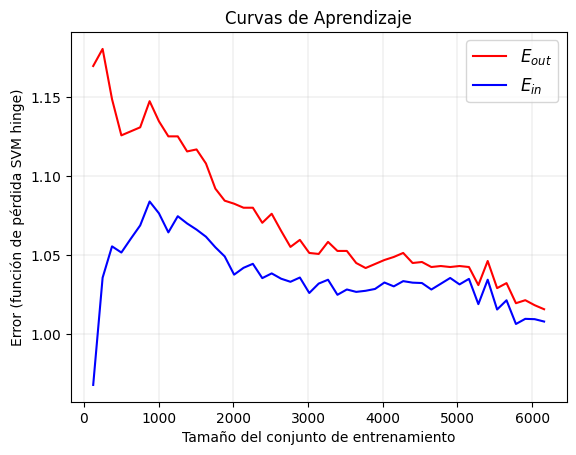

In [ ]:

max_iters = 10000
C=1
class_weight_val ={0: 1, 1: 6}

# Crear el modelo de SVM con kernel lineal con los parámetros elegidos
SVC_modelo_Curvas = SVC(
  kernel='linear', # Tipo del kernel, utilizamos lineal para que el modelo sea lineal
  max_iter = max_iters, #número máximo de iteraciones
  random_state=1, # Establecer semilla para los numero aleatorios generados para
  C = C, # parametro de reularización
  tol = 1e-3, # tolerancia del criterio de parada por defecto
  class_weight=class_weight_val # Determina los pesos de las clases
  )

trainPortion = 0.8 #porcentaje de train, el porcentaje de validacion será la resta de 1 menos el porcentaje de train

indexesData = np.arange(len(trainY)) #Indices del conjunto de muestras

np.random.shuffle(indexesData) #Desordenar indices de las muestras
numberTrain = round(len(indexesData)*trainPortion) #numero de muestras para train
trainIndexes = indexesData[:numberTrain]
valIndexes = indexesData[numberTrain:]

E_in = []
E_out = []
ejeX = []
numiters = 50
for i in range(1,numiters):
  ejeX.append(i*len(trainIndexes)//numiters)
  # Entrenar el modelo con los datos de entrenamiento
  SVC_modelo_Curvas.fit(preproc_trainX[trainIndexes[:i*len(trainIndexes)//numiters]], trainY[trainIndexes[:i*len(trainIndexes)//numiters]])
  # Obtener error en entrenamiento
  y_pred = SVC_modelo_Curvas.predict(preproc_trainX[trainIndexes[:i*len(trainIndexes)//numiters]])
  E_in.append(hinge_loss(trainY[trainIndexes[:i*len(trainIndexes)//numiters]], y_pred))
  # Obtener error en validación
  y_pred = SVC_modelo_Curvas.predict(preproc_trainX[valIndexes])
  E_out.append(hinge_loss(trainY[valIndexes], y_pred))


plt.figure()
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Error (función de pérdida SVM hinge)")
plt.plot(ejeX, E_out, 'r',label=r'$E_{out}$')
plt.plot(ejeX, E_in, 'b',label=r'$E_{in}$')

plt.legend(fontsize = 12) # poner el tamaño de la leyenda como en el resultado dado
plt.grid(visible=True,linewidth=0.2) # poner la cuadricula con el grosor del resultado dado

plt.show()

Podemos observar en el gráfico de las curvas de aprendizaje que el modelo se comporta de forma correcta ajustandose al problema y obteniendo una buena generalización a medida que aumenta el tamaño del conjunto de muestras. Cuantos más datos se usan para entrenar el modelo, más generalización se consigue (al tener más información del problema y de la función objetivo) y por tanto el error $E_{out}$ se acerca cada vez más al error $E_{in}$. El modelo lineal es capaz de ajustar mejor los datos cuanto menos haya, ya que al haber menos datos, el modelo tiene que predecir menos muestras y entonces puede ajustarse mejor a una cantidad menor de datos, por lo tanto el error $E_{in}$ aumenta con el tamaño del conjunto de entrenamiento. Por otro lado, cuantos más muestras se tienen, más información se tiene del problema y por tanto se puede obtener una mayor generalización de la función objetivo obteniendo un error $E_{out}$ menor a medida que aumenta el tamaño del conjunto de muestras. Es por esto que los errores $E_{in}$ y $E_{out}$ tienden a acercarse y converger a medida que aumenta el tamaño del conjunto de entrenamiento.   
A partir de estos resultados, podemos establecer que, aunque seguramente no sea el modelo con el que se obtienen los mejores resultados, ya que los modelos no lineales son más potentes, este modelo ha conseguido ajustarse en cierta medida al problema y aprender cierta variabilidad consiguiendo generalizar el resultado obtenido fuera del entrenamiento. Esto se puede observar principalmente en la disminución del error $E_{out}$ a medida que aumenta el tamaño del conjunto de entrenamiento, ya que cuanta más información se le ofrece al modelo para entrenar, mejoes resultados y error $E_{out}$ obtiene y por tanto más aprende.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos.

Tal y como he realizado en esta práctica, realizaría los siguientes pasos:


1.   Separar el conjunto de datos en una parte de entrenameinto y otra de test
2.   Analizar el problema observando de donde proceden los datos, que variables se utilizan y de que tipo, como se han extraido los datos y elegir los modelos que se pretenden usar para ajustar este problema específico.
3.   Analizar el conjunto de datos de training para tratar de encontrar variables constantes, desequilibrio en las clases y cualquier peculiaridad más del conjunto de entrenamiento.
4.   Preprocesar los datos codificando las varaibles que sean necesarias como las categóricas, escalar los datos y aplicar cualquier procesamiento necesario al conjutno de datos.
5.   Establecer la técnica de Validación cruzada eligiendo el número de particiones si los datos son suficientes como para permitirlo.
6.   Establecer las métrcias que son necesarias dependiendo del conjunto de datos y los hiperparámetros que se van a escoger experimentalmente junto con la regularización elegida para el conjutno de datos en concreto.
7.   Realiza la técnica de Validación cruzada para elegir los hiperparámetros de los modelos y evaluar los resultados para obtener la mejor hipótesis final para el problema.
8.   Estimar el error  $E_{out}$ a partir del conjunto de test y evaluar los resultados obtenidos finales. Este modelo sería el modelo que se porpondría a la empresa junto con el error $E_{out}$ estimado a partir del error $E_{test}$.

Durante los apartados anteriores he explicado los motivos que me han llevado a tomar cada decisión justificando las ventajas y desventajas de realizar cada paso.



El error $E_{out}$ sería una estimación de este error a partir del error $E_{test}$ obtenido mediante el conjunto de test que he separado de los datos que me ofrece la empresa. Por lo tanto el error $E_{out}$ sería el error $E_{test}$ que obtengo a partir de mi modelo final que he elegido como mejor modelo. Este estimador del error $E_{out}$ es el mejor estimador debido a la teoría de la dimensión de Vapink-Chervonenkis junto con la teoría desarrollada en torno a la desigualdad de Hoeffding que ofrecen unas cotas del error $E_{out}$ en torno a los valores que se pueden obtener de los errores $E_{test}$ y $E_{in}$. Sin embargo, el uso de un conjunto de test implica un entrenamiento del modelo con un conjunto de datos menor, lo que afectará a la generalización y ajuste del prblema y por lo tanto a los resultados obtenidos. Cuanto mayor sea el conjunto de test, mejor será la estimación del error $E_{out}$ y peores resultado de entrenameinto se obtendrán, es por eso que se debe elgir un equilibrio entre una mejor estimación y un entrenamiento mejor.  

En algunos casos, si los datos son escasos o se considera que no son suficientes, se podría utilizar todo el conjunto de datos como entrenamiento y estimar el error $E_{out}$ a partir del error $E_{in}$ del entrenamiento. Este es el caso extremo de obtener un peor estimador pero entrenar con un conjunto mayor de datos puede dar lugar a obtener mejores resultados en el ajuste del modelo.

Esto ocurre también con Cross-Validation donde se utiliza una parte del conjunto de entrenamiento para validar y obtener una estimación del error del modelo. Al realizar diversas particiones y estimar con un conjunto de validación distinto cada vez se puede obtener un buen estimador del error realizando el promerdio de todas las particiones pero esto conlleva un aumento del coste computacional a parteque puede dificultar el proceso de aprendizaje del modelo.

En el problema que se ha tratado de resolver mediante aprendizaje automático en los apartados anteriores, he explicado cuál era el mejor modelo que se ha conseguido obtener y yo propondría ese modelo para resolver este problema con el error $E_{out}$ que se ha estimado a partir del error $E_{test}$. Si además se disponde del conjunto de test, yo, personalmente, ofrecería como error del modelo el error $E_{test}$ obtenido a partir del modelo entrenado con los datos de entrenamiento, y después volvería a entrenar el modelo con el conjunto total de los datos (test incluido) y ofrecería ese modelo como modelo final. Como este modelo ha sido entrenado con una cantidad mayor de datos, el error proprocionado $E_{test}$ será una cota superior del error $E_{out}$ del modelo final y por tanto el error ofrecido será pesimista. Si por el contrario no se disponde del conjunto de test y la empresa se encarga de realiza el test conotro conjunto de datos, aun así del conjunto que se disponde crearía mis propias particiones como se ha comentado antes en entrenameinto y test y se haría el mismo proceso siguiendo los pasos.